# Web Scraping with Python

- Use `requests` and `BeautifulSoup` to access web content
- Locate elements of interest using knowledge of `HTML` and `CSS`
- Investigate the resulting text using `NLTK`

**OVERVIEW**: This lesson aims to give students experience acessing and analyzing information from a webpage if we don't have an easy API for data.  We will start by scraping some quantitative data from a webpage and using our earier work with `Pandas` and `Seaborn` to analyze.  Next, we will scrape some textual data and investigate this using Python's `NLTK` library for natural language processing.

### HTML and Webpages

HTML stands for Hyper Text Markup Language.  Here, we recognize that HTML is a markup language, meant to determine that way information is laid out on a screen.  This is different than Python.

For example, if we wanted to create a webpage with a title and an image, we would use HTML tags to do so.  The following code would accomplish this.

```HTML
<h1>This is the Header</h1>
<img src = "image/path.png">
```

There are many different tags available, and we can have tags within other tags, as well as apply labels to specify how the tag is applied in the larger page.

```HTML
<h3>Another Header</h3>
<p> This is a paragraph with <strong> nested tags </strong> that would make part of a paragraph emphasized </p>
```

The Jupyter notebook has a magic cell for HTML code, and we can play with some basic tags to get a feel for how HTML works.

In [164]:
%%HTML
<h3>The Notebook Renders HTML</h3>
<p> HTML is rendered between tags that organize the page. </p>
<img src = "images/blog.svg">

### Problems

Go to [w3schools](https://www.w3schools.com/html/default.asp) website and investigate tags that do the following:

1. Headers
2. Images
3. Paragraphs
4. Lists
5. Tables

Create a small webpage in Jupyter using all of these tags together.

### Getting Data from a Website with Requests

![](images/requests.png)

To access information from the web, we will use the `requests` library.  Requests allows us to easily send HTTP requests and store these responses in our notebook.  

In [1]:
import requests

In [43]:
url = "https://matheducators.stackexchange.com/"

In [44]:
mathed = requests.get(url)

In [92]:
mathed

<Response [200]>

In [95]:
mathed.content[-400:-1]

b'             var sc = document.createElement(\'script\');\r\n                    sc.async = true;\r\n                    sc.src = (ssl ? \'https://sb\' : \'http://b\') + \'.scorecardresearch.com/beacon.js\';\r\n                    s.parentNode.insertBefore(sc, s);\r\n                    _comscore.push({ c1: "2", c2: "17440561" });\r\n            })();\r\n            \r\n\r\n</script>\r\n        \r\n    \r\n    </body>\r\n</html'

In [168]:
mathed.text[:200]

'<!DOCTYPE html>\r\n<html>\r\n\r\n    <head>\r\n\r\n        <title>Mathematics Educators Stack Exchange</title>\r\n        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/matheducators/img/favicon.ic'

### Making Sense of the HTML

![](images/bs4.jpg)

Here, we will use the BeautifulSoup library to make sense of the response data.  We can take the response and apply an HTML parser from BeautifulSoup in order to locate specific parts of the webpage we are interested in.  Together with the developer views in our browser, we will be able to locate pieces of the website quickly and easily.

First, we will import BeautifulSoup and create a soup variable that applies the html parser to our web content.  From here, we can examine the results with the `prettify()` function.  This shows us our HTML is a structured format.

In [169]:
from bs4 import BeautifulSoup

In [170]:
soup = BeautifulSoup(mathed.content, 'html.parser')

In [171]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Mathematics Educators Stack Exchange
  </title>
  <link href="https://cdn.sstatic.net/Sites/matheducators/img/favicon.ico?v=db1b0b038e42" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon.png?v=41c548fc9c75" rel="apple-touch-icon image_src"/>
  <link href="/opensearch.xml" rel="search" title="Mathematics Educators Stack Exchange" type="application/opensearchdescription+xml"/>
  <meta content="Q&amp;A for those involved in the field of teaching mathematics" name="description"/>
  <meta content="website" property="og:type"/>
  <meta content="https://matheducators.stackexchange.com/" property="og:url"/>
  <meta content="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon@2.png?v=adf129f0fc54" itemprop="image primaryImageOfPage" property="og:image"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="matheducators.stackexchange.com" name="twitter:domain"/>
  <meta conte

From here, we can navigate the text using different HTML attributes.  We can also search with `find` and `find_all` for smaller chunks of information that includes class labels for certain tags.

In [172]:
soup.title

<title>Mathematics Educators Stack Exchange</title>

In [173]:
soup.title.name

'title'

In [174]:
soup.title.parent.name

'head'

In [175]:
soup.p

<p>Stack Exchange network consists of 171 Q&amp;A communities including <a href="https://stackoverflow.com">Stack Overflow</a>, the largest, most trusted online community for developers to learn, share their knowledge, and build their careers.</p>

In [179]:
soup.a['class']

['-logo', 'js-gps-track', 'js-network-logo']

In [177]:
soup.find_all('div')

[<div id="notify-container"></div>,
 <div id="custom-header"></div>,
 <div class="-container">
 <div class="-main">
 <a class="-logo js-gps-track js-network-logo" data-gps-track="stack_exchange_popup.show" href="#">
 <svg aria-hidden="true" class="svg-icon native iconLogoSEAlternativeSm" height="15" viewbox="0 0 110 15" width="110"><g><path d="M50.4 11.92l-1.98-3.23-1.05 1.17v2.06h-1.42V2.08h1.42v6.07l2.76-3.24h1.73L49.4 7.66l2.77 4.26h-1.76zm-7.86.08c-1.6 0-3.16-.97-3.16-3.6 0-2.62 1.56-3.57 3.16-3.57.97 0 1.66.28 2.33.98l-.98.94c-.45-.48-.8-.66-1.35-.66s-1.01.22-1.32.62c-.3.39-.42.88-.42 1.7 0 .81.11 1.32.42 1.71.3.4.77.62 1.32.62s.9-.18 1.35-.66l.98.93c-.67.7-1.36.99-2.33.99zm-5.7-3.18h-1.67c-.84 0-1.27.38-1.27 1.01 0 .64.4 1 1.3 1 .54 0 .95-.05 1.33-.4.2-.21.3-.54.3-1.04v-.57zm.02 3.1v-.64c-.51.51-1 .72-1.88.72-.89 0-1.47-.2-1.9-.64a2.13 2.13 0 0 1-.57-1.5c0-1.17.83-2.02 2.45-2.02h1.87v-.5c0-.88-.44-1.3-1.55-1.3-.78 0-1.16.17-1.55.67l-.94-.87c.67-.77 1.37-1 2.55-1 1.94 0 2.92.8 2.9

In [178]:
soup.find(id="custom-header")

<div id="custom-header"></div>

We can extract all the url links as follows.  Recall that the `<a>` tag is the hyperreference tag for HTML.

In [180]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
https://stackoverflow.com
https://stackexchange.com
None
https://matheducators.stackexchange.com
https://matheducators.stackexchange.com/help
https://chat.stackexchange.com?tab=site&host=matheducators.stackexchange.com
https://matheducators.stackexchange.com
https://matheducators.meta.stackexchange.com
https://matheducators.stackexchange.com/users/signup?ssrc=site_switcher&returnurl=https%3a%2f%2fmatheducators.stackexchange.com%2f
https://matheducators.stackexchange.com/users/login?ssrc=site_switcher&returnurl=https%3a%2f%2fmatheducators.stackexchange.com%2f
https://stackexchange.com/sites
https://stackoverflow.blog
/tour
/help
https://matheducators.meta.stackexchange.com
https://stackoverflow.com/company/about
https://www.stackoverflowbusiness.com/?ref=topbar_help
https://stackexchange.com/users/?tab=inbox
https://stackexchange.com/users/?tab=reputation
#
https://stackexchange.com
https://matheducators.stackexchange.com/users/login?ssrc=head&returnurl=https%3a%2f%2fmatheducators.sta

In [181]:
print(soup.get_text())




Mathematics Educators Stack Exchange
















            StackExchange.ready(function() {
                StackExchange.realtime.subscribeToActiveQuestions('548', 'home-active');
            });
        

                MathJax.Hub.Config({"HTML-CSS": { preferredFont: "TeX", availableFonts: ["STIX","TeX"], linebreaks: { automatic:true }, EqnChunk: (MathJax.Hub.Browser.isMobile ? 10 : 50) },
                    tex2jax: { inlineMath: [ ["$", "$"], ["\\\\(","\\\\)"] ], displayMath: [ ["$$","$$"], ["\\[", "\\]"] ], processEscapes: true, ignoreClass: "tex2jax_ignore|dno" },
                    TeX: { 
                        noUndefined: { attributes: { mathcolor: "red", mathbackground: "#FFEEEE", mathsize: "90%" } }, Macros: { href: "{}" } },
                    messageStyle: "none"
            });
            


        StackExchange.ready(function () {
            StackExchange.realtime.init('wss://qa.sockets.stackexchange.com');
            StackExchange.realtime.subscribeT

In [100]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>Mathematics Educators Stack Exchange</title>
 <link href="https://cdn.sstatic.net/Sites/matheducators/img/favicon.ico?v=db1b0b038e42" rel="shortcut icon"/>
 <link href="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon.png?v=41c548fc9c75" rel="apple-touch-icon image_src"/>
 <link href="/opensearch.xml" rel="search" title="Mathematics Educators Stack Exchange" type="application/opensearchdescription+xml"/>
 <meta content="Q&amp;A for those involved in the field of teaching mathematics" name="description"/>
 <meta content="website" property="og:type"/>
 <meta content="https://matheducators.stackexchange.com/" property="og:url"/>
 <meta content="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon@2.png?v=adf129f0fc54" itemprop="image primaryImageOfPage" property="og:image"/>
 <meta content="summary" name="twitter:card"/>
 <meta content="matheducators.stackexchange.com" name="twitter:domain"/>
 <meta content="Mathematics Edu

In [205]:
BeautifulSoup("Sacr&eacute; bleu!", "html.parser")

Sacré bleu!

### Soup Objects

There are four kinds of things in BeautifulSoup:

- `Tag`
- `NavigableString`
- `BeautifulSoup`
- `Comment`

**Tags** correspond to our normal HTML tags.

In [187]:
soup = BeautifulSoup('<b class="boldest">Extremely bold</b>', "html.parser")
tag = soup.b
type(tag)

bs4.element.Tag

In [193]:
tag.name

'b'

**Attributes**: Tags can have additional attributes.  For example, the paragraph tag 

```HTML
`<p id = "info"> This is a paragraph with an attribute</p>`
```

has the attribute `id = "info"`.

In [200]:
soup = BeautifulSoup('<p id = "info"> This is a paragraph with an attribute</p>', "html.parser")
tag = soup.p

In [201]:
tag['id']

'info'

In [202]:
tag.attrs

{'id': 'info'}

In [203]:
tag['id'] = 'verybold'

In [204]:
tag.attrs

{'id': 'verybold'}

**Multi-valued Atrributes**

There are some attributes that can have multiple values.  If we return to our Mathematics Education StackExchange example, we see the most common example `class` frequently.  Others such as `rel, rev, accept-charset, headers`, and `accesskey`.

In [208]:
soup = BeautifulSoup(mathed.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Mathematics Educators Stack Exchange
  </title>
  <link href="https://cdn.sstatic.net/Sites/matheducators/img/favicon.ico?v=db1b0b038e42" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon.png?v=41c548fc9c75" rel="apple-touch-icon image_src"/>
  <link href="/opensearch.xml" rel="search" title="Mathematics Educators Stack Exchange" type="application/opensearchdescription+xml"/>
  <meta content="Q&amp;A for those involved in the field of teaching mathematics" name="description"/>
  <meta content="website" property="og:type"/>
  <meta content="https://matheducators.stackexchange.com/" property="og:url"/>
  <meta content="https://cdn.sstatic.net/Sites/matheducators/img/apple-touch-icon@2.png?v=adf129f0fc54" itemprop="image primaryImageOfPage" property="og:image"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="matheducators.stackexchange.com" name="twitter:domain"/>
  <meta conte

In [209]:
soup.a['class']

['-logo', 'js-gps-track', 'js-network-logo']

In [215]:
soup.div['id']

'notify-container'

**Navigable String**

A string corresponds to text within a tag.  These objects are a `NavigableString` type object.

In [216]:
tag.string

' This is a paragraph with an attribute'

In [217]:
type(tag.string)

bs4.element.NavigableString

### Navigating the Document



In [218]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

In [219]:
soup.head

<head><title>The Dormouse's story</title></head>

In [220]:
soup.title

<title>The Dormouse's story</title>

In [221]:
soup.body.b

<b>The Dormouse's story</b>

In [222]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [223]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [224]:
head_tag = soup.head

In [225]:
head_tag

<head><title>The Dormouse's story</title></head>

In [226]:
head_tag.contents

[<title>The Dormouse's story</title>]

In [228]:
title_tag = head_tag.contents[0]

In [229]:
title_tag

<title>The Dormouse's story</title>

In [230]:
title_tag.contents

["The Dormouse's story"]

In [232]:
text = title_tag.contents[0]

In [233]:
text.contents

AttributeError: 'NavigableString' object has no attribute 'contents'

In [234]:
for child in title_tag.children:
    print(child)

The Dormouse's story


In [235]:
head_tag.contents

[<title>The Dormouse's story</title>]

In [236]:
for child in head_tag.descendants:
    print(child)

<title>The Dormouse's story</title>
The Dormouse's story


**`.string`**

In [237]:
title_tag.string

"The Dormouse's story"

In [238]:
head_tag.string

"The Dormouse's story"

In [239]:
title_tag.parent

<head><title>The Dormouse's story</title></head>

In [240]:
title_tag.children

### Investigating texts from Project Gutenberg

![](images/gutenberg.png)

In [255]:
url = "http://www.gutenberg.org/files/15784/15784-0.txt"

In [256]:
response = requests.get(url)

In [257]:
type(response)

requests.models.Response

In [258]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [259]:
len(soup_dos)

1

In [260]:
dos_text = soup_dos.get_text()

In [261]:
type(dos_text)

str

In [262]:
len(dos_text)

550924

In [266]:
dos_text[:100]

'The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended\r\nby Isaac Newton\r\n\r\nThis e'

### Analyzing the Text with NLTK

The Natural Language Toolkit is a popular Python library for text analysis.  We will use it to split the text into individual words(tokens), and create a plot of the frequency distribution of the tokens.  

In [272]:
from nltk import word_tokenize
tokens = word_tokenize(dos_text)

In [273]:
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

In [274]:
text = nltk.Text(tokens)

In [275]:
text[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

In [279]:
fdist = nltk.FreqDist(text)

In [287]:
type(fdist)

nltk.probability.FreqDist

In [281]:
fdist.most_common(50)

[(',', 8704),
 ('the', 7568),
 ('and', 5062),
 ('of', 5017),
 ('.', 3525),
 ('in', 1805),
 ('to', 1508),
 (';', 1200),
 (':', 1158),
 ('[', 1023),
 (']', 1023),
 ('that', 1004),
 ('by', 970),
 ('was', 941),
 ('a', 804),
 ('his', 703),
 ('with', 612),
 ('or', 588),
 ('years', 567),
 ('from', 531),
 ('for', 482),
 ('were', 455),
 ('their', 405),
 ('is', 394),
 ('he', 392),
 ('this', 389),
 ('year', 384),
 ('_Egypt_', 380),
 ('King', 378),
 ('which', 373),
 ('as', 373),
 ('at', 357),
 ('after', 348),
 ('they', 345),
 ('into', 342),
 ('it', 341),
 ('who', 322),
 ('l.', 313),
 ('son', 310),
 ('be', 303),
 ('Reign', 290),
 ('before', 284),
 ('Kings', 265),
 ('first', 261),
 ('about', 258),
 ('had', 250),
 ('not', 250),
 ('but', 242),
 ('The', 236),
 ('one', 235)]

In [286]:
fdist['blood']

5

In [291]:
fdist = nltk.FreqDist(word.lower() for word in word_tokenize(dos_text))

<IPython.core.display.Javascript object>


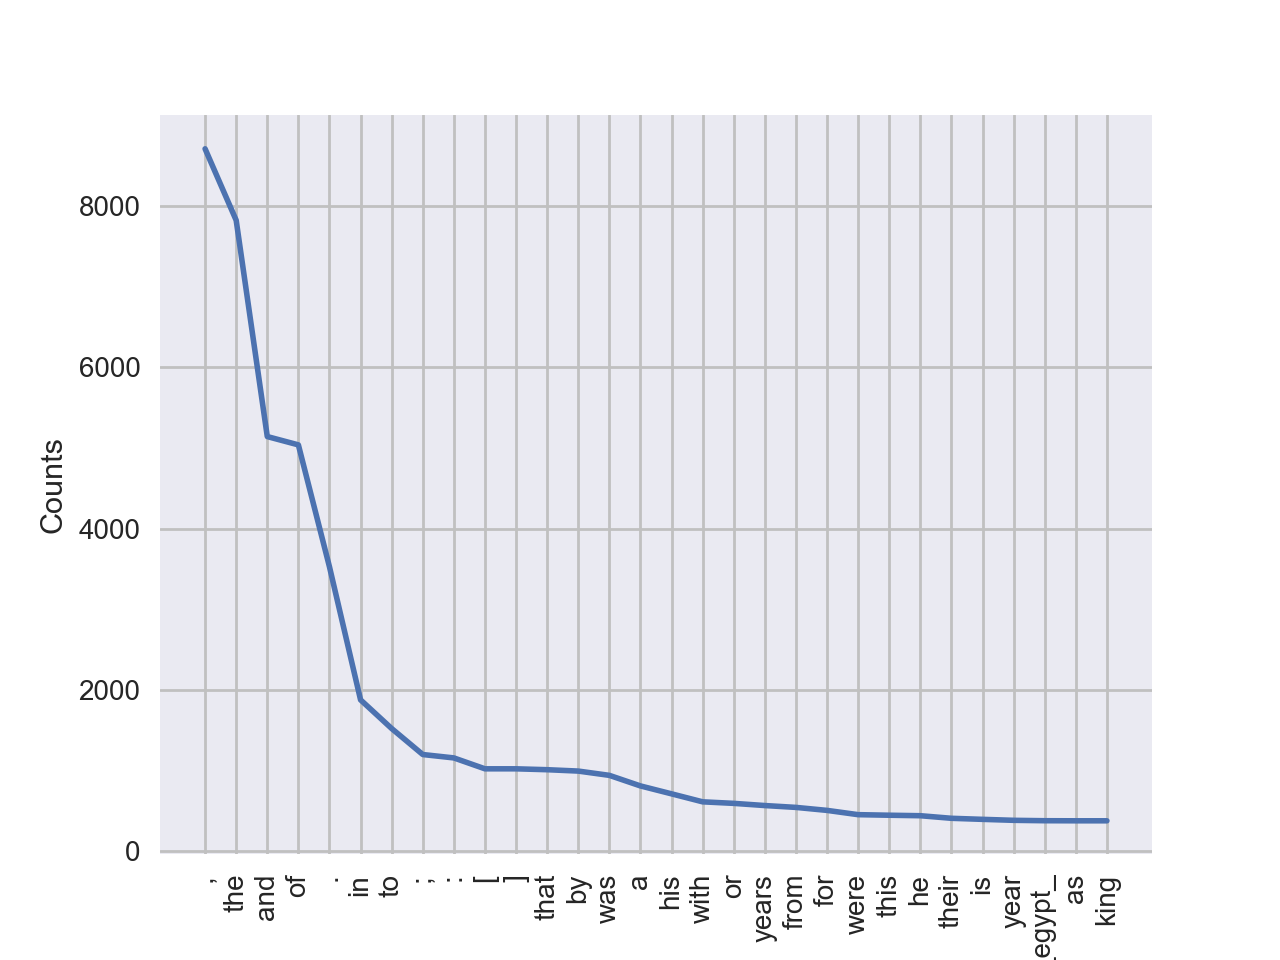

In [295]:
plt.figure()
fdist.plot(30)

<IPython.core.display.Javascript object>


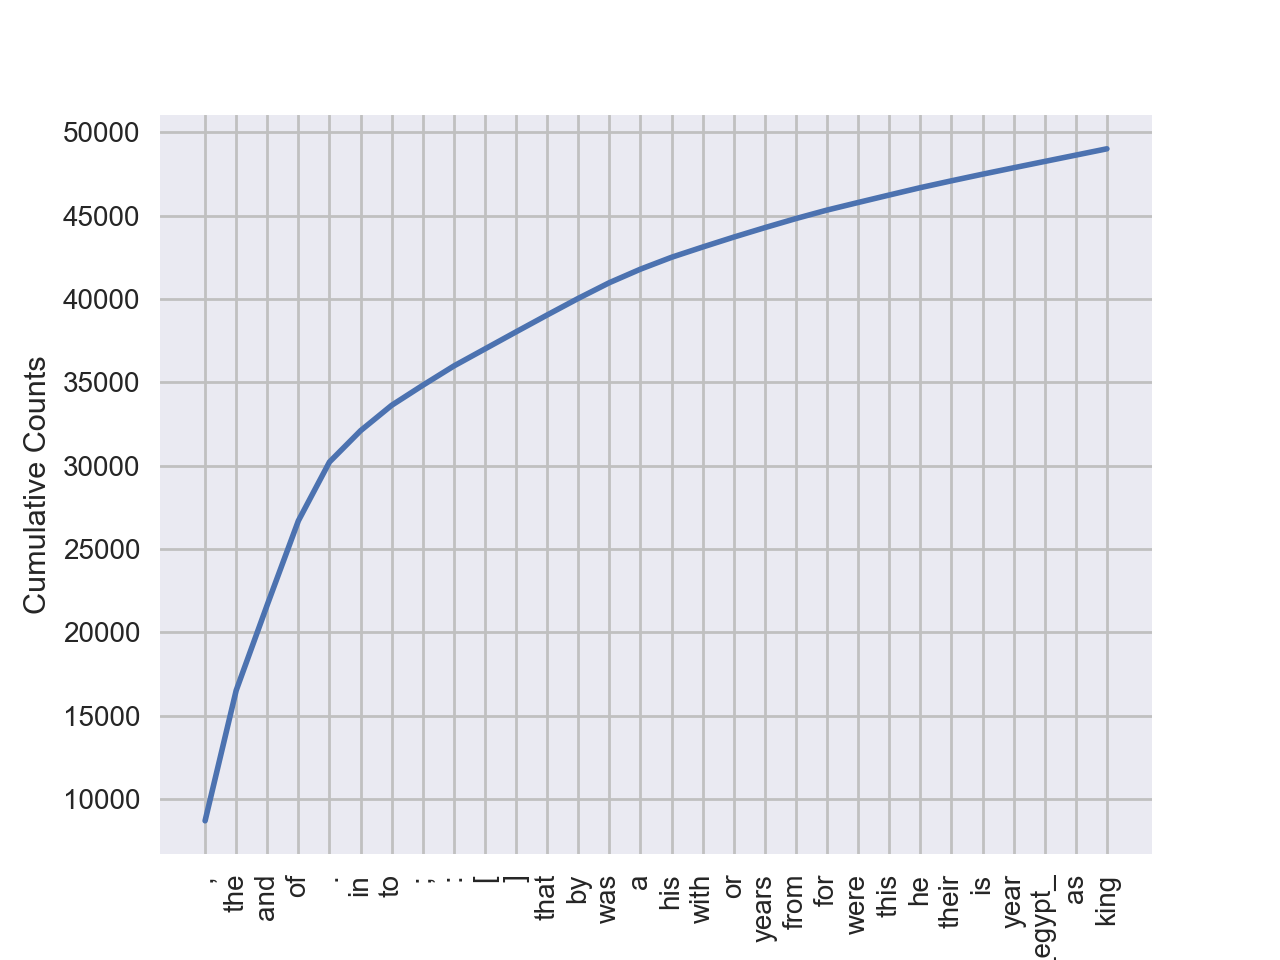

In [297]:
plt.figure()
fdist.plot(30, cumulative=True)